<a href="https://colab.research.google.com/github/hkuennemann/Deep-Learning-PyTorch/blob/main/04_PyTorch_Custom_Datasets/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Fri Mar 14 14:48:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.5.1+cu124


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. More epochs -> The longer the model can train, i.e. the more epochs, the better the model can learn patterns, which then might lead to a better performance.
2. More hidden layers / units -> By using more layers in the neural network, the model gets more complex, but might be able to see features that it could not see with fewer hidden units.
3. Transfer learning -> By utilizing a model that performed well on a similar problem, and then only fine-tuning it on the problem at hand, underfitting might be prevented

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
  print(f"{image_path} directory exists - skipping download.")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unszip data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak, sushi data...


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [5]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/sushi/1957449.jpg
Image class: sushi
Image height: 512
Image width: 512


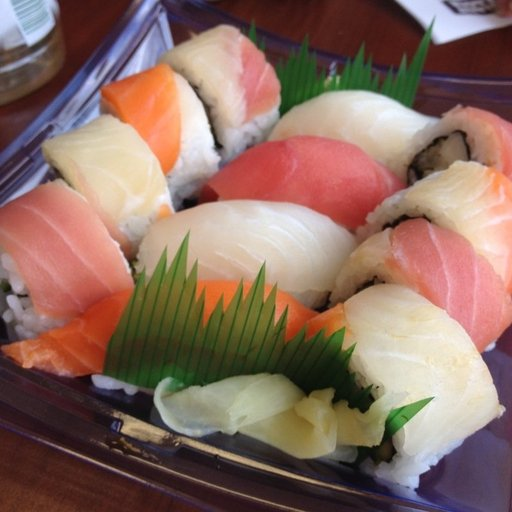

In [6]:
# Visualize an image
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get the image class from the path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

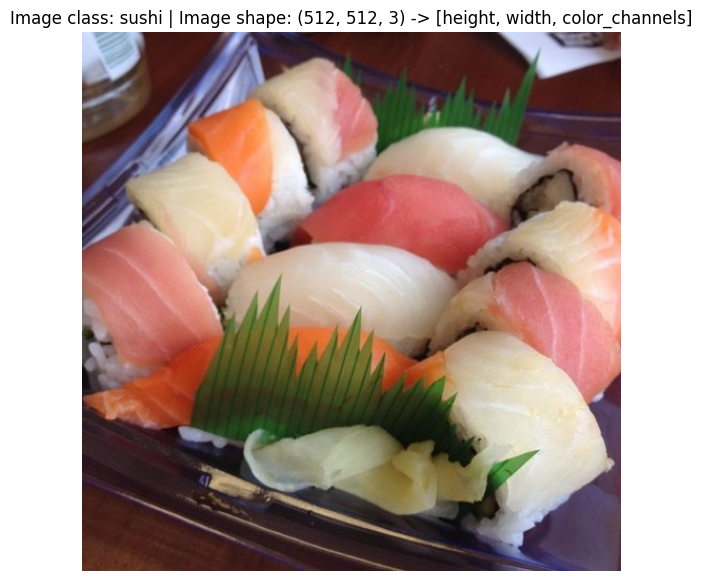

In [7]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [64]:
# 3.1 Transforming data with torchvision.transforms
from torchvision import transforms

# Write transform for turning images into tensors
data_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

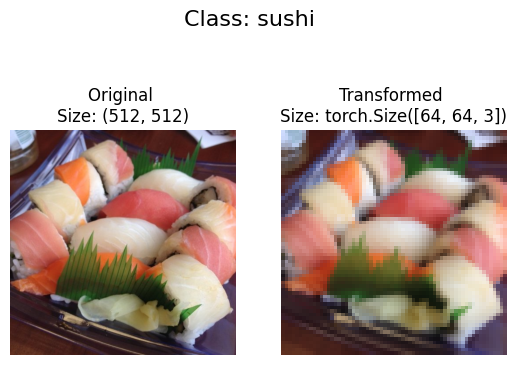

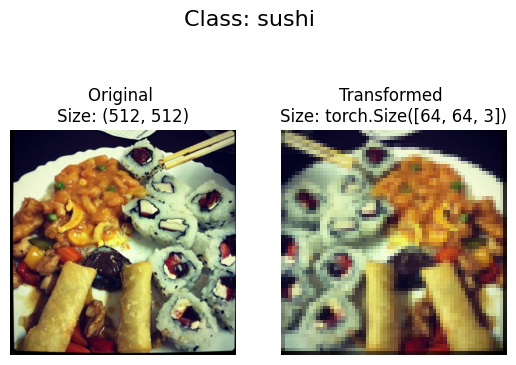

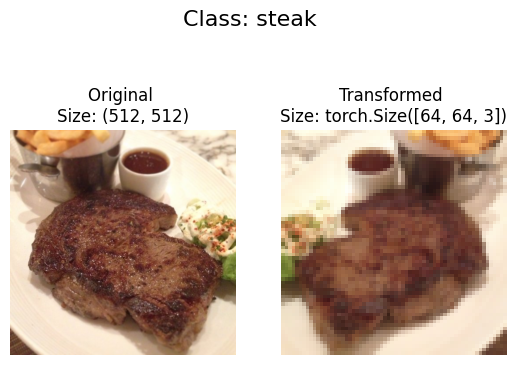

In [65]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """Selects random images from a path of images and loads/transforms them , then plots the original vs the transformed version"""
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

    # Transform and plot target image
    transformeed_image = transform(f).permute(1, 2, 0)
    ax[1].imshow(transformeed_image)
    ax[1].set_title(f"Transformed \nSize: {transformeed_image.shape}")
    ax[1].axis('off')

    fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)

plot_transformed_images(image_paths = image_path_list, transform = data_transform, n=3, seed=42)

### Load image data using `ImageFolder`

In [66]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform,
                                  target_transform = None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = data_transform,
                                 target_transform = None)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [67]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [68]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [69]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [70]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              num_workers = NUM_WORKERS,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             num_workers = NUM_WORKERS,
                             shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f7beef77210>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7bef70f050>)

In [71]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(225, 75)

In [72]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


8 in the train dataloader and 3 in the test dataloader

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [73]:
from torch import nn

class TinyVGG(nn.Module):
  """Creates the TinyVGG architecture"""
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2,
                   stride=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*16*16,
                out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    # x = self.conv_block_1(x)
    # print(x.shape)
    # x = self.conv_block_2(x)
    # print(x.shape)
    # x= self.classifier(x)
    # print(x.shape)
    # return x
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [74]:
# Pass dummy data through model
dummy_x = torch.rand(size=[1, 3, 64, 64])
model_0(dummy_x.to(device))

tensor([[0.0167, 0.0321, 0.0129]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 4. Create training and testing functions for `model_0`.

In [75]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [76]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():

    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


In [77]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [78]:
model_0_5epochs = TinyVGG(input_shape = 3,
                          hidden_units = 10,
                          output_shape = len(class_names)).to(device)

# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0_5epochs.parameters(),
                             lr=0.001)

# Training
model_0_5epochs_results = train(model = model_0_5epochs,
                                train_dataloader = train_dataloader,
                                test_dataloader = test_dataloader,
                                optimizer = optimizer,
                                loss_fn = loss_fn,
                                epochs = 5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1089 | train_acc: 0.3200 | test_loss: 1.1008 | test_acc: 0.2533
Epoch: 2 | train_loss: 1.0430 | train_acc: 0.4000 | test_loss: 1.1272 | test_acc: 0.4133
Epoch: 3 | train_loss: 0.9626 | train_acc: 0.5733 | test_loss: 0.9768 | test_acc: 0.5067
Epoch: 4 | train_loss: 0.9049 | train_acc: 0.5644 | test_loss: 1.0137 | test_acc: 0.4000
Epoch: 5 | train_loss: 0.8832 | train_acc: 0.5911 | test_loss: 0.9593 | test_acc: 0.5200


In [79]:
model_0_20epochs = TinyVGG(input_shape = 3,
                           hidden_units = 10,
                           output_shape = len(class_names)).to(device)

# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0_20epochs.parameters(),
                             lr=0.001)

# Training
model_0_20epochs_results = train(model = model_0_20epochs,
                                 train_dataloader = train_dataloader,
                                 test_dataloader = test_dataloader,
                                 optimizer = optimizer,
                                 loss_fn = loss_fn,
                                 epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1059 | train_acc: 0.3511 | test_loss: 1.0939 | test_acc: 0.3867
Epoch: 2 | train_loss: 1.0857 | train_acc: 0.3689 | test_loss: 1.1061 | test_acc: 0.5067
Epoch: 3 | train_loss: 1.0322 | train_acc: 0.5778 | test_loss: 0.9901 | test_acc: 0.4800
Epoch: 4 | train_loss: 0.9306 | train_acc: 0.6000 | test_loss: 0.9973 | test_acc: 0.4133
Epoch: 5 | train_loss: 0.8948 | train_acc: 0.5822 | test_loss: 0.9653 | test_acc: 0.4533
Epoch: 6 | train_loss: 0.8552 | train_acc: 0.6133 | test_loss: 1.0141 | test_acc: 0.4133
Epoch: 7 | train_loss: 0.8358 | train_acc: 0.6044 | test_loss: 0.9684 | test_acc: 0.4800
Epoch: 8 | train_loss: 0.7396 | train_acc: 0.6756 | test_loss: 1.0709 | test_acc: 0.4133
Epoch: 9 | train_loss: 0.7197 | train_acc: 0.6622 | test_loss: 1.1463 | test_acc: 0.5067
Epoch: 10 | train_loss: 0.6406 | train_acc: 0.7467 | test_loss: 1.0595 | test_acc: 0.5200
Epoch: 11 | train_loss: 0.5754 | train_acc: 0.7378 | test_loss: 1.1550 | test_acc: 0.5067
Epoch: 12 | train_l

In [80]:
model_0_50epochs = TinyVGG(input_shape = 3,
                           hidden_units = 10,
                           output_shape = len(class_names)).to(device)

# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0_50epochs.parameters(),
                             lr=0.001)

# Training
model_0_50epochs_results = train(model = model_0_50epochs,
                                 train_dataloader = train_dataloader,
                                 test_dataloader = test_dataloader,
                                 optimizer = optimizer,
                                 loss_fn = loss_fn,
                                 epochs = 50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1056 | train_acc: 0.3333 | test_loss: 1.0986 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.1018 | train_acc: 0.3067 | test_loss: 1.1007 | test_acc: 0.2667
Epoch: 3 | train_loss: 1.0992 | train_acc: 0.3289 | test_loss: 1.1013 | test_acc: 0.2533
Epoch: 4 | train_loss: 1.0989 | train_acc: 0.3600 | test_loss: 1.1001 | test_acc: 0.3733
Epoch: 5 | train_loss: 1.0956 | train_acc: 0.4089 | test_loss: 1.0640 | test_acc: 0.4267
Epoch: 6 | train_loss: 0.9839 | train_acc: 0.5556 | test_loss: 1.0196 | test_acc: 0.4933
Epoch: 7 | train_loss: 0.9452 | train_acc: 0.5778 | test_loss: 0.9558 | test_acc: 0.5067
Epoch: 8 | train_loss: 0.9055 | train_acc: 0.6044 | test_loss: 0.9725 | test_acc: 0.4533
Epoch: 9 | train_loss: 0.8511 | train_acc: 0.5911 | test_loss: 1.0103 | test_acc: 0.4533
Epoch: 10 | train_loss: 0.8407 | train_acc: 0.6311 | test_loss: 0.9798 | test_acc: 0.4400
Epoch: 11 | train_loss: 0.7911 | train_acc: 0.6444 | test_loss: 0.9896 | test_acc: 0.4800
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

Note, imo also the second model, i.e. training it on 20 epochs, already overfits.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [81]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1_20epochs = TinyVGG(input_shape = 3,
                           hidden_units = 2 * 10,
                           output_shape = len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1_20epochs.parameters(),
                             lr=0.001)

# Training
model_1_20epochs_results = train(model = model_1_20epochs,
                                 train_dataloader = train_dataloader,
                                 test_dataloader = test_dataloader,
                                 optimizer = optimizer,
                                 loss_fn = loss_fn,
                                 epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0998 | train_acc: 0.3867 | test_loss: 1.0507 | test_acc: 0.4267
Epoch: 2 | train_loss: 1.0001 | train_acc: 0.5200 | test_loss: 1.0134 | test_acc: 0.4533
Epoch: 3 | train_loss: 0.9545 | train_acc: 0.5867 | test_loss: 0.9841 | test_acc: 0.4800
Epoch: 4 | train_loss: 0.8851 | train_acc: 0.6089 | test_loss: 1.0052 | test_acc: 0.4400
Epoch: 5 | train_loss: 0.8742 | train_acc: 0.6133 | test_loss: 1.0612 | test_acc: 0.5067
Epoch: 6 | train_loss: 0.8370 | train_acc: 0.6400 | test_loss: 0.9999 | test_acc: 0.4533
Epoch: 7 | train_loss: 0.7949 | train_acc: 0.6578 | test_loss: 1.0613 | test_acc: 0.4933
Epoch: 8 | train_loss: 0.7152 | train_acc: 0.6622 | test_loss: 1.1115 | test_acc: 0.4533
Epoch: 9 | train_loss: 0.7404 | train_acc: 0.7022 | test_loss: 1.1350 | test_acc: 0.4533
Epoch: 10 | train_loss: 0.6794 | train_acc: 0.7333 | test_loss: 1.1651 | test_acc: 0.4667
Epoch: 11 | train_loss: 0.6518 | train_acc: 0.7067 | test_loss: 1.2012 | test_acc: 0.4933
Epoch: 12 | train_l

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [82]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [83]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.


Excellent, we now have double the training and testing images...

In [84]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [85]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(root = train_data_20_percent_path,
                                    transform = simple_transform,
                                    target_transform = None)

test_data_20_percent = ImageFolder(root = test_data_20_percent_path,
                                   transform = simple_transform,
                                   target_transform = None)

# Create dataloaders
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_20_percent = DataLoader(dataset = train_data_20_percent,
                                         batch_size = BATCH_SIZE,
                                         num_workers = NUM_WORKERS,
                                         shuffle = True)

test_dataloader_20_percent = DataLoader(dataset = test_data_20_percent,
                                        batch_size = BATCH_SIZE,
                                        num_workers = NUM_WORKERS,
                                        shuffle = False)


In [87]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2_20epochs = TinyVGG(input_shape = 3,
                           hidden_units = 20,
                           output_shape = len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2_20epochs.parameters(),
                             lr=0.001)

# Training
model_2_20epochs_results = train(model = model_2_20epochs,
                                 train_dataloader = train_dataloader_20_percent,
                                 test_dataloader = test_dataloader_20_percent,
                                 optimizer = optimizer,
                                 loss_fn = loss_fn,
                                 epochs = 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1042 | train_acc: 0.3312 | test_loss: 1.1003 | test_acc: 0.2875
Epoch: 2 | train_loss: 1.0837 | train_acc: 0.3583 | test_loss: 1.0734 | test_acc: 0.3517
Epoch: 3 | train_loss: 1.0321 | train_acc: 0.4313 | test_loss: 0.9623 | test_acc: 0.4926
Epoch: 4 | train_loss: 0.9203 | train_acc: 0.5542 | test_loss: 0.9129 | test_acc: 0.5818
Epoch: 5 | train_loss: 0.8629 | train_acc: 0.6312 | test_loss: 0.9121 | test_acc: 0.5619
Epoch: 6 | train_loss: 0.8717 | train_acc: 0.5792 | test_loss: 0.9478 | test_acc: 0.5239
Epoch: 7 | train_loss: 0.8779 | train_acc: 0.6083 | test_loss: 0.8850 | test_acc: 0.5619
Epoch: 8 | train_loss: 0.7619 | train_acc: 0.6958 | test_loss: 0.9255 | test_acc: 0.5608
Epoch: 9 | train_loss: 0.7953 | train_acc: 0.6562 | test_loss: 0.8954 | test_acc: 0.5091
Epoch: 10 | train_loss: 0.7765 | train_acc: 0.7042 | test_loss: 0.8893 | test_acc: 0.6068
Epoch: 11 | train_loss: 0.7332 | train_acc: 0.6792 | test_loss: 0.8560 | test_acc: 0.6256
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [93]:
# Download a custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it does not already exits
if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/images/04-pizza-dad.jpeg")
    print(f'Downloading {custom_image_path}...')
    f.write(request.content)
else:
  print(f'{custom_image_path} already exists, skipping download...')

data/04-pizza-dad.jpeg already exists, skipping download...


In [94]:
from typing import List
import torchvision

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform = None,
                        device = device):
  """Makes a prediction on a target image with a trained model and plots the image and prediction."""
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255.0

  # Transform if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on the target device
  model.to(device)

  # Turn on eval/inference mode and make prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image (this is the batch dimesnion, e.g. our model will predict on batches of 1x images)
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image.to(device)) # make sure the target image is on the right device

  # Convert logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred, dim = 1)

  # Convert prediction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim = 1)

  # Convert prediction probabilities -> prediction labels
  target_image_pred_labels = torch.argmax(target_image_pred_probs, dim = 1)

  # Plot the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1, 2, 0)) # remove batch dimension and put color channel last
  if class_names:
    title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis("off")

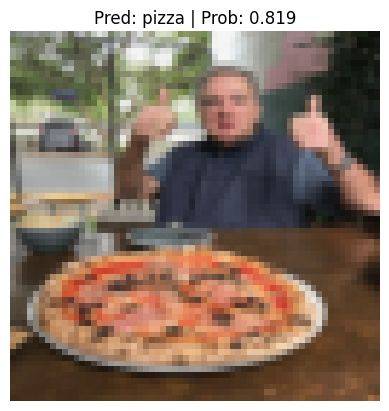

In [96]:
# Create transform pipeline to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize(size = (64, 64))
])

# pred on our custom image
pred_and_plot_image(model = model_2_20epochs,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform = custom_image_transform,
                    device = device)

It worked! 🎉